In [1]:
# Import other modules not related to PySpark
import os
import sys 
import seaborn as sns 
import pandas as pd
from pandas import DataFrame
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick  
import matplotlib
from mpl_toolkits.mplot3d import Axes3D 
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 
%matplotlib inline  


import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string


In [2]:
df = pd.read_csv('merged4_clean_1.csv')
df.replace('-', np.nan, inplace=True)
df= df.applymap(lambda x: x.replace('�', 'e') if isinstance(x, str) else x)

null_percentage = df.isnull().sum() / len(df) * 100
null_percentage 

Group_ID                                       36.604431
Numero ticket                                   0.000225
Breve description                              40.125070
Date de creation                                0.000000
Duree de premier prise en charge               73.774604
Date de resolution                              0.305028
Max Resolution Date                             0.000000
Type de ticket                                  0.000000
Cause reelle                                   13.851310
Action Name                                     0.000000
Intervenant                                    49.079069
Code Appli                                     34.845349
Groupe                                         36.604431
Priorite                                        0.000000
Beneficiaire                                    0.000000
Date de creation de laction en cours           97.555281
Date de prise en charge de laction en cours    73.774604
Statut                         

In [3]:
# df.drop(columns=['Action Name' , 
#                  'Service Manager HELP','Numero ticket','Solution' , 
#                  'Groupe' , 'Entite du responsable du groupe de la derniere action' , 
#                  'Priorite' , 'Beneficiaire' , 'Date de creation de laction en cours' , 
#                  'Date de prise en charge de laction en cours' , 'Statut' ,'Nom appli' , 'Cause'
#                   ,'Intervenant' ] ,inplace=True )

df = df[['Breve description', 'Date de creation', 'Date de resolution',
       'Max Resolution Date', 'Type de ticket', 'Cause reelle', 'Code Appli' , 'Groupe']]


In [57]:
df.columns 

Index(['Breve description', 'Date de creation', 'Date de resolution',
       'Max Resolution Date', 'Type de ticket', 'Cause reelle', 'Code Appli'],
      dtype='object')

In [4]:
null_percentage = df.isnull().sum() / len(df) * 100 
null_percentage 

Breve description      40.125070
Date de creation        0.000000
Date de resolution      0.305028
Max Resolution Date     0.000000
Type de ticket          0.000000
Cause reelle           13.851310
Code Appli             34.845349
Groupe                 36.604431
dtype: float64

In [5]:
df_resolu = df[df['Date de resolution'].isnull() == False ]
df_resolu = df_resolu[df_resolu['Breve description'].isnull() == False ]


In [183]:
null_percentage = df_resolu.isnull().sum() / len(df_resolu) * 100
null_percentage  

Breve description       0.000000
Date de creation        0.000000
Date de resolution      0.000000
Max Resolution Date     0.000000
Type de ticket          0.000000
Cause reelle            6.934360
Code Appli             30.328670
Groupe                 31.831757
dtype: float64

In [6]:

# # Ensure nltk resources are downloaded
# nltk.download('stopwords')
# nltk.download('wordnet')


In [179]:
df.iloc[8356]

Breve description                      Son
Date de creation       2021-01-29 09:04:00
Date de resolution     2021-02-17 14:35:00
Max Resolution Date             2021-02-18
Type de ticket                    Incident
Cause reelle            Anomalie technique
Code Appli                             NaN
Groupe                                 NaN
Name: 8356, dtype: object

In [188]:
# !pip install git+https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git 


In [184]:
# import nltk
# import string
# from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer


# french_stopwords = nltk.corpus.stopwords.words('french') 
# lemmatizer = FrenchLefffLemmatizer()

# def French_Preprocess_listofSentence(listofSentence):
#     preprocess_list = []
#     for sentence in listofSentence:
#         if pd.notnull(sentence):  # Ensure sentence is not NaN
#             # Convert to lowercase and remove punctuation
#             sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])

#             # Remove digits
#             sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit())

#             # Tokenize sentence
#             tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_num)

#             # Remove stopwords
#             words_w_stopwords = [i for i in tokenize_sentence if i not in french_stopwords]

#             # Lemmatize words
#             words_lemmatize = [lemmatizer.lemmatize(w) for w in words_w_stopwords]

#             # Join lemmatized words back into a sentence
#             sentence_clean = ' '.join(words_lemmatize)

#             preprocess_list.append(sentence_clean)
#         else:
#             preprocess_list.append('')  # Handle NaN values

#     return preprocess_list

# df_resolu['Cleaned description'] = French_Preprocess_listofSentence(df_resolu['Breve description'])


In [7]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize  
    tokens = text.split()
    # Remove stop words 
    stop_words = set(stopwords.words('french'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)
# df_resolu['Breve description'].fillna('No description', inplace=True)

# Apply text cleaning
df_resolu['Cleaned description'] = df_resolu['Breve description'].apply(clean_text)


In [8]:
df_resolu[df_resolu['Cleaned description']=='']

,Breve description,Date de creation,Date de resolution,Max Resolution Date,Type de ticket,Cause reelle,Code Appli,Groupe,Cleaned description
8356,Son,2021-01-29 09:04:00,2021-02-17 14:35:00,2021-02-18,Incident,Anomalie technique,NaN,NaN,
9299,pas de son,2021-08-31 10:01:00,2021-08-31 11:16:00,2021-09-06,Incident,Anomalie fonctionnelle,NaN,NaN,
12107,...,2023-02-16 10:57:00,2023-02-16 10:59:00,2023-02-17,Incident,Anomalie technique,NaN,NaN,
12350,pas de son,2023-03-28 08:33:00,2023-03-29 08:12:00,2023-04-04,Incident,Anomalie technique,NaN,NaN,
17387,SE,2023-11-14 15:22:00,2023-11-14 16:58:00,2023-11-15,Assistance,Cas non prevu - evolution,TRE,FCT E-TRESO,
...,...,...,...,...,...,...,...,...,...
433483,SE,2023-07-26 12:01:00,2023-07-28 10:09:00,2023-07-27,Assistance,NaN,TRE,AMI SIEGE,
433922,SE,2024-02-07 08:23:00,2024-02-12 11:15:00,2024-02-09,Incident,Autre e non identifiee,TRE,AMI SIEGE,
435074,D,2020-03-18 09:05:00,2020-03-18 10:47:00,2020-04-01,Assistance,Parametrage errone,BEL,AMI SIEGE,
442865,SE,2024-02-08 13:26:00,2024-02-09 07:06:00,2024-02-09,Assistance,Manque d'information,TRE,FCT E-TRESO METIER,


In [9]:
df_resolu =  df_resolu[(df_resolu['Cleaned description']=='' ) == False]

In [10]:
df_resolu.drop(columns=['Breve description' ] , inplace=True)

In [191]:
df_resolu  

,Date de creation,Date de resolution,Max Resolution Date,Type de ticket,Cause reelle,Code Appli,Groupe,Cleaned description
3,2019-05-03 13:28:00,2019-06-27 16:01:00,2019-05-20,Non Qualifie,Cas non prevu - evolution,SFF,SFF - Team SFF,install dll vm capgemini e casablanca
4,2020-01-24 09:50:00,2020-09-13 14:43:00,2020-02-07,Non Qualifie,NaN,SBF,COF ESB - FINANCEMENT METIER,pret tourisme
5,2020-01-27 08:58:00,2020-01-27 13:10:00,2020-02-10,Incident,Erreur de geste deexploitation,SFF,SFF - Team SFF,invsffprd fondsgererestservice v1mandataireres...
6,2020-04-15 08:07:00,2020-04-15 08:20:00,2020-04-29,Incident,Bug applicatif,SBF,COF ESB - FINANCEMENT METIER,calculette esb lance lorsque lon clique dessus
7,2020-05-05 06:33:00,2020-09-13 15:38:00,2020-05-13,Non Qualifie,NaN,SBF,COF ESB - FINANCEMENT METIER,calculette esb dossier i follow cp 4231033 dc ...
...,...,...,...,...,...,...,...,...
444527,2023-07-17 08:59:00,2023-07-18 07:52:00,2023-07-18,Incident,Mauvaise qualite de donnees,PPR,FPA - Anaplan Budget & Charges,j4tap3ka alimentation ttiers
444528,2023-12-09 05:35:00,2023-12-11 14:46:00,2023-12-11,Incident,Erreur de configuration deinfrastructure,CDG,FPA - Anaplan Budget & Charges,j4ksl0ja alim slm pivot pnb
444538,2019-06-05 07:53:00,2019-10-24 15:05:00,2019-06-13,Non Qualifie,Erreur de configuration deinfrastructure,CDG,FPA - Anaplan Budget & Charges,detection nouvelles valeurs referentiel prod pnb
444547,2023-10-13 15:35:00,2023-10-17 07:38:00,2023-10-16,Incident,Anomalie technique,PPR,FPA - Anaplan Budget & Charges,j4tap4ka alimentation referentiel


In [11]:
df_knn = df_resolu.copy()     

In [12]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
code_appli_encoded = encoder.fit_transform(df_knn[['Code Appli']].fillna('missing'))

# Convert sparse matrix to dense array
code_appli_encoded_dense = code_appli_encoded.toarray()

# Apply KNN imputation to fill missing values
imputer = KNNImputer(n_neighbors=5)
code_appli_imputed_dense = imputer.fit_transform(code_appli_encoded_dense)

# Decode the imputed values back to original categorical values
code_appli_imputed = encoder.inverse_transform(code_appli_imputed_dense)

# Update the DataFrame with the imputed values
df_knn['Code Appli'] = code_appli_imputed




In [112]:
df_knn.isnull().sum() / len(df_knn) * 100 

Date de creation        0.000000
Date de resolution      0.000000
Max Resolution Date     0.000000
Type de ticket          0.000000
Cause reelle            0.000000
Code Appli              0.000000
Groupe                 31.831757
Cleaned description     0.000000
dtype: float64

In [13]:
df_knn['Cause reelle'].fillna('Pas de cause' , inplace=True) 

In [14]:
df_knn_1 = df_knn.copy()  
df_knn_1.drop(columns=['Groupe'],inplace=True) 

In [15]:
df_knn_1['Date de creation'] = pd.to_datetime(df_knn_1['Date de creation'])
df_knn_1['Date de resolution'] = pd.to_datetime(df_knn_1['Date de resolution'])

# Calculate time difference in days
df_knn_1['Resolution Time (hours)'] = (df_knn_1['Date de resolution'] - df_knn_1['Date de creation']).dt.total_seconds() / 3600



In [16]:
df_knn_1_time = df_knn_1.copy()
df_knn_1_time['Max Resolution Date'] = pd.to_datetime(df_knn_1_time['Max Resolution Date'])

df_knn_1_time['Creation Day'] = df_knn_1_time['Date de creation'].dt.day
df_knn_1_time['Creation Month'] = df_knn_1_time['Date de creation'].dt.month
df_knn_1_time['Creation Year'] = df_knn_1_time['Date de creation'].dt.year
df_knn_1_time['Creation Hour'] = df_knn_1_time['Date de creation'].dt.hour
df_knn_1_time['Creation Minute'] = df_knn_1_time['Date de creation'].dt.minute

# Extract day, month, and year from 'Max Resolution Date'
df_knn_1_time['Max Resolution Day'] = df_knn_1_time['Max Resolution Date'].dt.day
df_knn_1_time['Max Resolution Month'] = df_knn_1_time['Max Resolution Date'].dt.month
df_knn_1_time['Max Resolution Year'] = df_knn_1_time['Max Resolution Date'].dt.year


In [17]:
df_knn_1_time.drop(columns=['Date de creation'  , 'Date de resolution' , 'Max Resolution Date'] , inplace=True)

c:\Users\ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 237.85 and sigma = 1096.80



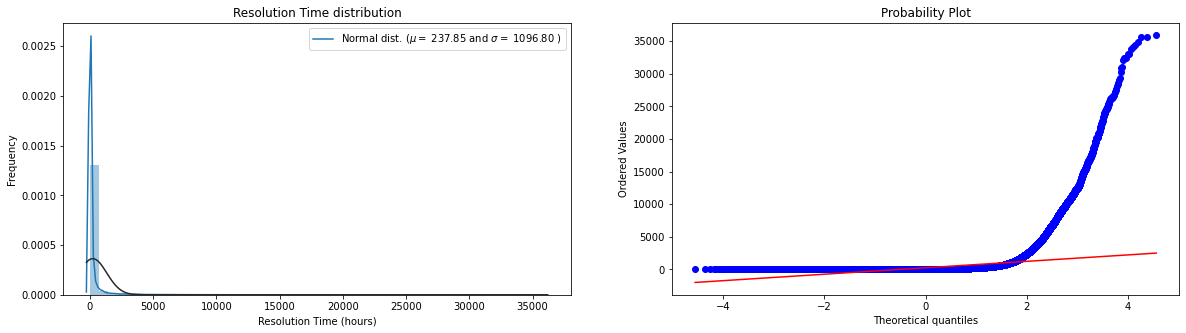

In [18]:
from scipy import stats

from scipy.stats import norm, skew
import statistics as stat

def plot_dist(df , col ) :
    plt.figure(figsize=(20,5)    )
    plt.subplot(1,2,1)

    sns.distplot(df[col] , fit=norm);

    (mu, sigma) = norm.fit(df[col])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('Resolution Time distribution')

    plt.subplot(1,2,2)
    res = stats.probplot(df[col], plot=plt)
    plt.show()  
plot_dist(df_knn_1_time , 'Resolution Time (hours)' ) 

In [142]:
df_knn_1_time['Resolution Time (hours)'].describe()

count    264855.000000
mean        237.765227
std        1096.585920
min           0.000000
25%           0.833333
50%           7.450000
75%          79.658333
max       35909.250000
Name: Resolution Time (hours), dtype: float64

In [143]:
Q1 = df_knn_1_time['Resolution Time (hours)'].quantile(0.25)
Q3 = df_knn_1_time['Resolution Time (hours)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_knn_1_time[(df_knn_1_time['Resolution Time (hours)'] < lower_bound) | (df_knn_1_time['Resolution Time (hours)'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 37320


c:\Users\ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 2.69 and sigma = 2.27



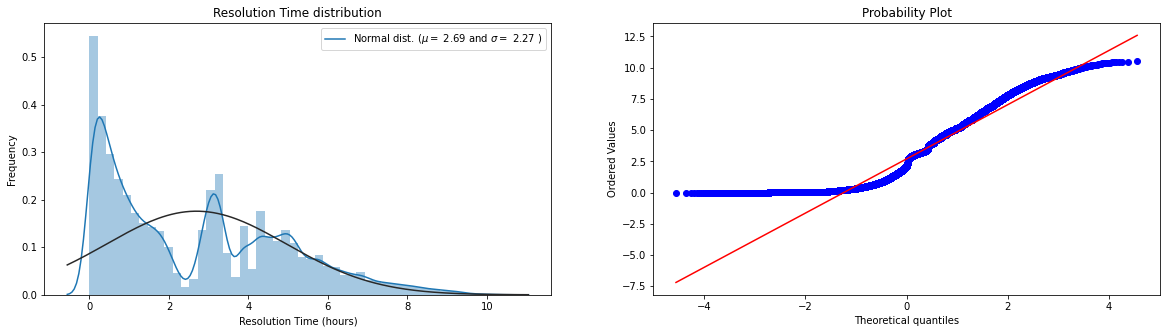

In [19]:
df_knn_1_time_log = df_knn_1_time.copy()
df_knn_1_time_log["Resolution Time (hours)"] = np.log1p(df_knn_1_time_log["Resolution Time (hours)"])

plot_dist(df_knn_1_time_log , 'Resolution Time (hours)' )

c:\Users\ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 7.74 and sigma = 13.33



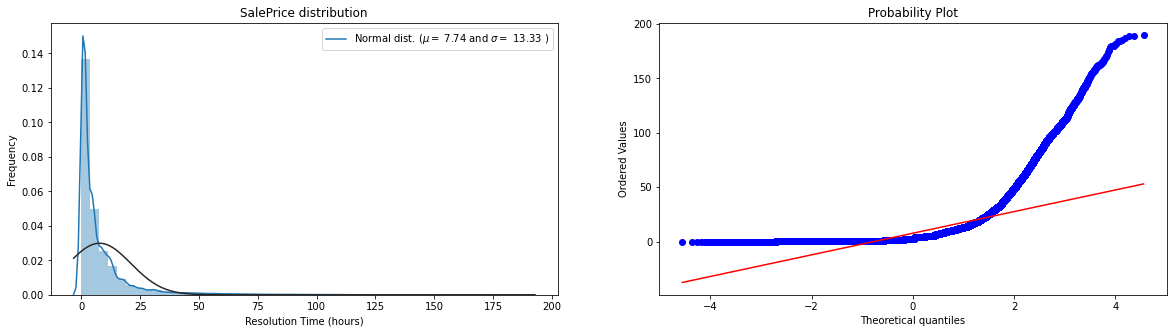

In [145]:
df_knn_1_time_exp = df_knn_1_time.copy()
df_knn_1_time_exp['Resolution Time (hours)'] = np.sqrt(df_knn_1_time_exp['Resolution Time (hours)'])

plot_dist(df_knn_1_time_exp , 'Resolution Time (hours)' )

c:\Users\ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 1.91 and sigma = 1.37



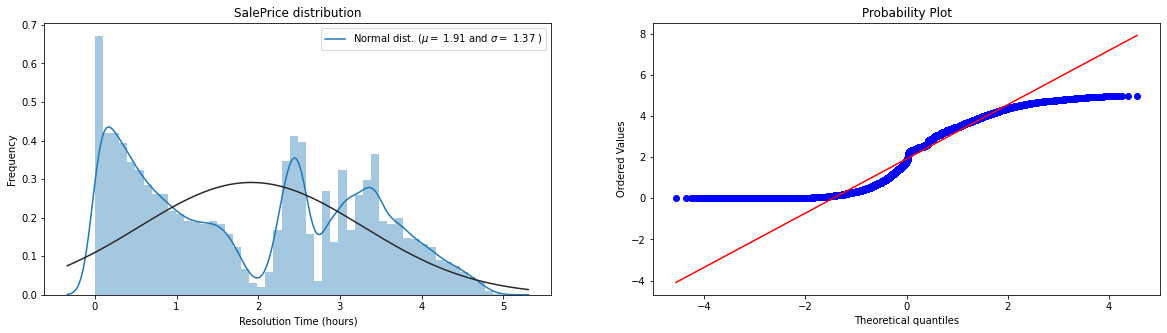

In [146]:
from scipy.stats import boxcox
df_knn_1_time_box = df_knn_1_time.copy()
df_knn_1_time_box['Resolution Time (hours)'], _ = boxcox(df_knn_1_time_box['Resolution Time (hours)'] + 1)  # Adding 1 to handle zeros

plot_dist(df_knn_1_time_box , 'Resolution Time (hours)' )



c:\Users\ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 0.00 and sigma = 1.00



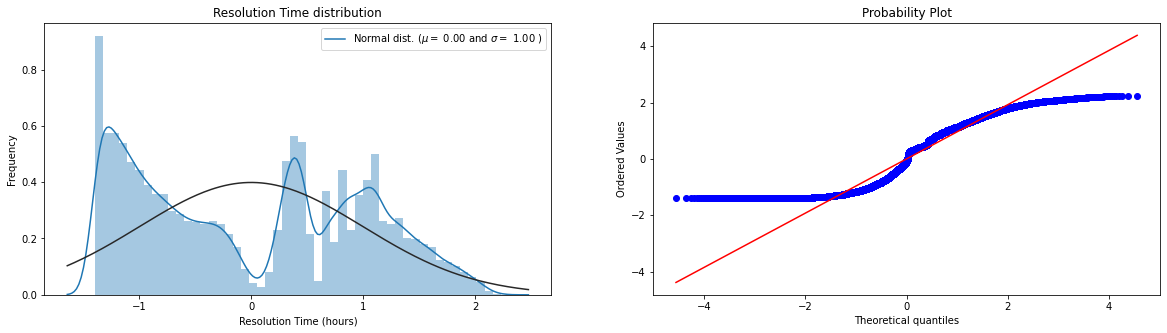

In [148]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df_knn_1_time_johnson = df_knn_1_time.copy()

df_knn_1_time_johnson['Resolution Time (hours)'] = pt.fit_transform(df_knn_1_time_johnson[['Resolution Time (hours)']])
plot_dist(df_knn_1_time_johnson , 'Resolution Time (hours)' )


c:\Users\ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 2.32 and sigma = 1.19



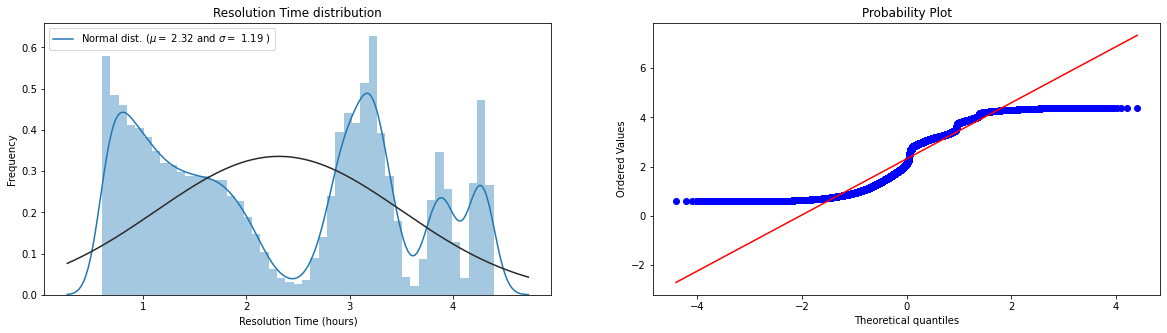

In [155]:
df_clipped = df_knn_1_time.copy()
quantile25 = df_clipped['Resolution Time (hours)'].quantile(0.25)

quantile75 = df_clipped['Resolution Time (hours)'].quantile(0.75)
# Filter out rows where 'Resolution Time (hours)' is above the 90th percentile
df_clipped = df_clipped[(df_clipped['Resolution Time (hours)'] <= quantile75) & (df_clipped['Resolution Time (hours)'] >= quantile25) ]

df_clipped["Resolution Time (hours)"] = np.log1p(df_clipped["Resolution Time (hours)"])

plot_dist(df_clipped , 'Resolution Time (hours)' )

In [158]:
len(df_clipped) / len(df_knn_1_time) 
## 50 % loss of information  

0.5017915463177965

In [28]:
df_prep =  df_knn_1_time_log.copy() 

In [29]:
df_prep[df_prep['Cleaned description']==''] 

,Type de ticket,Cause reelle,Code Appli,Cleaned description,Resolution Time (hours),Creation Day,Creation Month,Creation Year,Creation Hour,Creation Minute,Max Resolution Day,Max Resolution Month,Max Resolution Year


In [30]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns
numeric_columns = ['Creation Day', 'Creation Month',
       'Creation Year', 'Creation Hour', 'Creation Minute',
       'Max Resolution Day', 'Max Resolution Month', 'Max Resolution Year']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply Standard Scaling
df_prep[numeric_columns] = scaler.fit_transform(df_prep[numeric_columns])


In [32]:
df_prep.drop(columns=['Cleaned description'] , inplace=True)

In [24]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Initialize TfidfVectorizer
# vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# # Fit and transform the text data
# text_features = vectorizer.fit_transform(df_prep['Cleaned description'])

# # Convert to DataFrame and concatenate with original DataFrame
# text_df = pd.DataFrame(text_features.toarray(), columns=vectorizer.get_feature_names_out())
# df_prep = pd.concat([df_prep, text_df], axis=1)

# # Drop the original text column
# df_prep.drop('Cleaned description', axis=1, inplace=True)


In [34]:
df_prep['Cause reelle'].value_counts()  

Manque d'information                                                                                41126
Anomalie technique                                                                                  37646
Erreur deutilisation applicative                                                                    30153
Anomalie fonctionnelle                                                                              22200
Autre e non identifiee                                                                              21102
Pas de cause                                                                                        18364
Cas non prevu - evolution                                                                           17319
Habilitations                                                                                       13270
Bug applicatif                                                                                      12273
Parametrage errone                            

In [35]:
df_encoded = pd.get_dummies(df_prep, columns=['Type de ticket', 'Cause reelle', 'Code Appli'])


In [36]:
df_encoded


,Resolution Time (hours),Creation Day,Creation Month,Creation Year,Creation Hour,Creation Minute,Max Resolution Day,Max Resolution Month,Max Resolution Year,Type de ticket_Assistance,...,Code Appli_YOO,Code Appli_ZDM,Code Appli_ZDP,Code Appli_ZUL,Code Appli_missing,Code Appli_peripherique,Code Appli_pieuvre,Code Appli_smartphone,Code Appli_tablette,Code Appli_visio_conference
3,7.188073,-1.405013,-0.436956,-1.680938,0.605540,-0.085834,0.505820,-0.457422,-1.695359,0,...,0,0,0,0,0,0,0,0,0,0
4,8.630144,0.989229,-1.578791,-0.972612,-0.611902,1.181217,-0.993041,-1.310636,-0.984750,0,...,0,0,0,0,0,0,0,0,0,0
5,1.648659,1.331263,-1.578791,-0.972612,-0.916263,1.641963,-0.647150,-1.310636,-0.984750,0,...,0,0,0,0,0,0,0,0,0,0
6,0.196115,-0.036875,-0.722415,-0.972612,-0.916263,-1.295293,1.543492,-0.741827,-0.984750,0,...,0,0,0,0,0,0,0,0,0,0
7,8.056453,-1.176990,-0.436956,-0.972612,-1.524984,0.202132,-0.301259,-0.457422,-0.984750,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444527,3.173181,0.191148,0.133962,1.152364,-0.916263,1.699556,0.275226,0.111388,1.147076,0,...,0,0,0,0,0,0,0,0,0,0
444528,4.063599,-0.720944,1.561257,1.152364,-1.829344,0.317318,-0.531853,1.533413,1.147076,0,...,0,0,0,0,0,0,0,0,0,0
444538,8.129234,-1.176990,-0.151497,-1.680938,-1.220623,1.353997,-0.301259,-0.173017,-1.695359,0,...,0,0,0,0,0,0,0,0,0,0
444547,4.489198,-0.264898,0.990339,1.152364,1.214261,0.317318,0.044632,0.964603,1.147076,0,...,0,0,0,0,0,0,0,0,0,0


### Preprocess

In [40]:
df = pd.read_csv('merged4_clean_1.csv')
df.replace('-', np.nan, inplace=True)
df= df.applymap(lambda x: x.replace('�', 'e') if isinstance(x, str) else x)
df = df[['Date de creation', 'Date de resolution',
       'Max Resolution Date', 'Type de ticket', 'Cause reelle', 'Code Appli' ]]


In [41]:
df_resolu = df[df['Date de resolution'].isnull() == False ] 
###### fill code appli KNN

encoder = OneHotEncoder()
code_appli_encoded = encoder.fit_transform(df_resolu[['Code Appli']].fillna('missing'))
code_appli_encoded_dense = code_appli_encoded.toarray()
imputer = KNNImputer(n_neighbors=5)
code_appli_imputed_dense = imputer.fit_transform(code_appli_encoded_dense)
code_appli_imputed = encoder.inverse_transform(code_appli_imputed_dense)
df_resolu['Code Appli'] = code_appli_imputed
df_resolu['Cause reelle'].fillna('Pas de cause' , inplace=True) 

#### date time modification 

df_resolu['Date de creation'] = pd.to_datetime(df_resolu['Date de creation'])
df_resolu['Date de resolution'] = pd.to_datetime(df_resolu['Date de resolution'])
df_resolu['Resolution Time (hours)'] = (df_resolu['Date de resolution'] - df_resolu['Date de creation']).dt.total_seconds() / 3600

df_resolu['Max Resolution Date'] = pd.to_datetime(df_resolu['Max Resolution Date'])

df_resolu['Creation Day'] = df_resolu['Date de creation'].dt.day
df_resolu['Creation Month'] = df_resolu['Date de creation'].dt.month
df_resolu['Creation Year'] = df_resolu['Date de creation'].dt.year
df_resolu['Creation Hour'] = df_resolu['Date de creation'].dt.hour
df_resolu['Creation Minute'] = df_resolu['Date de creation'].dt.minute

df_resolu['Max Resolution Day'] = df_resolu['Max Resolution Date'].dt.day
df_resolu['Max Resolution Month'] = df_resolu['Max Resolution Date'].dt.month
df_resolu['Max Resolution Year'] = df_resolu['Max Resolution Date'].dt.year

df_resolu.drop(columns=['Date de creation' , 'Date de resolution' , 'Max Resolution Date'] , inplace=True)

## log 
df_resolu["Resolution Time (hours)"] = np.log1p(df_resolu["Resolution Time (hours)"])

### standarization 

from sklearn.preprocessing import StandardScaler

numeric_columns = ['Creation Day', 'Creation Month',
       'Creation Year', 'Creation Hour', 'Creation Minute',
       'Max Resolution Day', 'Max Resolution Month', 'Max Resolution Year']

scaler = StandardScaler()

# Apply Standard Scaling
df_resolu[numeric_columns] = scaler.fit_transform(df_resolu[numeric_columns])

df_resolu = pd.get_dummies(df_resolu, columns=['Type de ticket', 'Cause reelle', 'Code Appli'])




C:\Users\ahmed\AppData\Local\Temp\ipykernel_1568\431797822.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resolu['Code Appli'] = code_appli_imputed
C:\Users\ahmed\AppData\Local\Temp\ipykernel_1568\431797822.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resolu['Cause reelle'].fillna('Pas de cause' , inplace=True)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_1568\431797822.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [43]:
len(df_resolu)  

443194

In [44]:
X = df_resolu.drop('Resolution Time (hours)', axis=1)

y = df_resolu['Resolution Time (hours)']

from sklearn.model_selection import train_test_split

# Split data into train and test sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import xgboost as xgb

xgb_reg = xgb.XGBRegressor()

xgb_reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

y_pred = xgb_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

Mean Squared Error: 3.786765900308554
R-squared: 0.3308984281452645


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

<Figure size 864x576 with 0 Axes>

<BarContainer object of 20 artists>

([<matplotlib.axis.YTick at 0x1c87d3a4760>,
 [Text(0, 0, 'Code Appli_VPN'),
  Text(0, 1, 'Code Appli_missing'),
  Text(0, 2, 'Code Appli_OLK'),
  Text(0, 3, 'Code Appli_TRE'),
  Text(0, 4, 'Code Appli_BSR'),
  Text(0, 5, 'Code Appli_HRA'),
  Text(0, 6, 'Code Appli_DHL'),
  Text(0, 7, 'Code Appli_HSF'),
  Text(0, 8, 'Cause reelle_Pas de cause'),
  Text(0, 9, 'Code Appli_SMH'),
  Text(0, 10, 'Code Appli_BEL'),
  Text(0, 11, 'Code Appli_ANN'),
  Text(0, 12, 'Code Appli_ADF'),
  Text(0, 13, 'Code Appli_BRI'),
  Text(0, 14, 'Code Appli_CLY'),
  Text(0, 15, 'Code Appli_TMS'),
  Text(0, 16, 'Code Appli_SLM'),
  Text(0, 17, 'Code Appli_ISM'),
  Text(0, 18, 'Code Appli_ATR'),
  Text(0, 19, 'Code Appli_BUO')])

Text(0.5, 0, 'Feature Importance')

Text(0, 0.5, 'Feature')

Text(0.5, 1.0, 'Top 20 Feature Importance - XGBoost Regressor')

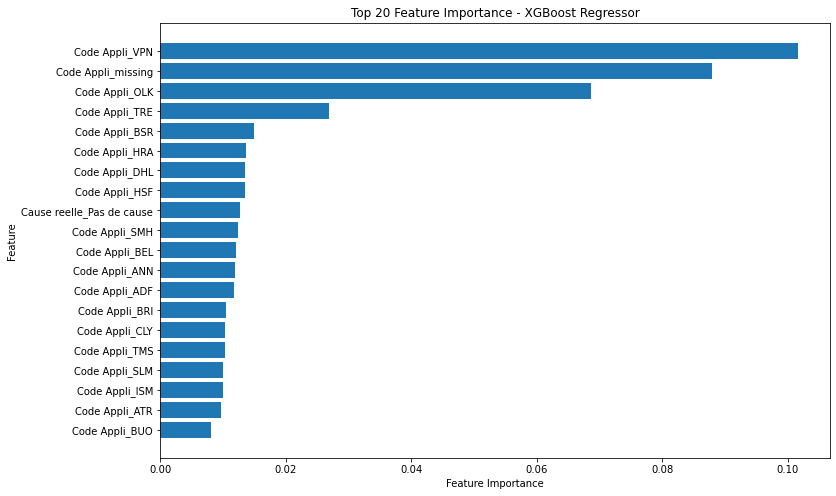

In [45]:
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np

# Assuming xgb_reg is your trained XGBoost regressor
# Assuming X_train is your feature DataFrame

# Train XGBoost regressor (assuming it's already trained)
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)

# Get feature importances
feature_importance = xgb_reg.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Take top 20 features
top_20_idx = sorted_idx[:20]
top_20_features = feature_names[top_20_idx]
top_20_importance = feature_importance[top_20_idx]

# Plot top 20 feature importances
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_20_importance)), top_20_importance, align='center')
plt.yticks(range(len(top_20_importance)), top_20_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importance - XGBoost Regressor')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


In [153]:
len(df_clipped)

203940

In [102]:
df_grp = df_knn.copy()  

In [105]:
df_mat = pd.read_csv('Matrice Incident (1) (1).csv' , sep=";")


In [106]:
code_appli_groups = {}

# Iterate through the DataFrame
for index, row in df_mat.iterrows():
    code_appli = row['Code appli']
    group_1 = row['Groupe 1']
    
    # If 'Code appli' is not already in the dictionary, create a new entry
    if code_appli not in code_appli_groups:
        code_appli_groups[code_appli] = [group_1]
    # If 'Code appli' is already in the dictionary, append the group to the existing list
    else:
        code_appli_groups[code_appli].append(group_1)


In [107]:
code_appli_groups 

{'CLY': ['CLY DSI CLARITY',
  'AMI SIEGE',
  'CLY DSI CLARITY',
  'CLY DSI CLARITY',
  'CLY DSI CLARITY'],
 'PRT': ['AMI SIEGE',
  'INO CASSIOPAE WEB SII METIER',
  'INO CASSIOPAE WEB CONTENTIEUX METIER',
  'INO CASSIOPAE WEB SRR METIER',
  'COF CASSIOPAE WEB SII METIER',
  'COF CASSIOPAE WEB SI2E METIER',
  'COF CASSIOPAE WEB CONTENTIEUX METIER',
  'INO CASSIOPAE WEB METIER',
  'INO CASSIOPAE WEB METIER'],
 'CBM': ['COF CASSIOPAE CBM CONTENTIEUX',
  'COF CASSIOPAE CBM METIER',
  'AMI SIEGE'],
 'SVI': ['AMI SIEGE', 'SVI - Team SVI', 'SVI - Team SVI'],
 'PDE': ['VZT - VizTech',
  'DFCB - Core Factory',
  'DFF - Factory Finance',
  'DFF - Factory Finance',
  'DATA - Team usages DATA',
  'TSE - IAE',
  'DFCB - Core Factory',
  'DFR - Factory Risque',
  'TSE - IAE',
  'DFCB - Core Factory',
  'DATA - Team usages DATA',
  'DFCB - Core Factory',
  'DFCB - Core Factory',
  'DFCB - Core Factory',
  'DFCB - Core Factory'],
 'SLM': ['DAB',
  'DAB',
  'DAB',
  'DAB',
  'SCP - Socle Comptable',
  

In [109]:
def assign_random_group(code_appli):
    if code_appli in code_appli_groups:
        return np.random.choice(code_appli_groups[code_appli])
    else:
        return np.nan

df_grp['Groupe'] = df_grp.apply(lambda row: assign_random_group(row['Code Appli']) if pd.isna(row['Groupe']) else row['Groupe'], axis=1)



In [115]:
df_grp.isnull().sum() / len(df_grp) * 100 

Date de creation        0.000000
Date de resolution      0.000000
Max Resolution Date     0.000000
Type de ticket          0.000000
Cause reelle            0.000000
Code Appli              0.000000
Groupe                 31.831757
Cleaned description     0.000000
dtype: float64

In [86]:
df_knn['Date de creation'] = pd.to_datetime(df_knn['Date de creation'])
df_knn['Date de resolution'] = pd.to_datetime(df_knn['Date de resolution'])

# Calculate time difference in days
df_knn['Resolution Time (hours)'] = (df_knn['Date de resolution'] - df_knn['Date de creation']).dt.total_seconds() / 3600



In [87]:
df_knn 

,Date de creation,Date de resolution,Max Resolution Date,Type de ticket,Cause reelle,Code Appli,Cleaned description,Resolution Time,Resolution Time (hours)
3,2019-05-03 13:28:00,2019-06-27 16:01:00,2019-05-20,Non Qualifie,Cas non prevu - evolution,SFF,install dll vm capgemini e casablanca,55,1322.550000
4,2020-01-24 09:50:00,2020-09-13 14:43:00,2020-02-07,Non Qualifie,Pas de cause,SBF,pret tourisme,233,5596.883333
5,2020-01-27 08:58:00,2020-01-27 13:10:00,2020-02-10,Incident,Erreur de geste deexploitation,SFF,invsffprd fondsgererestservice v1mandataireres...,0,4.200000
6,2020-04-15 08:07:00,2020-04-15 08:20:00,2020-04-29,Incident,Bug applicatif,SBF,calculette esb lance lorsque lon clique dessus,0,0.216667
7,2020-05-05 06:33:00,2020-09-13 15:38:00,2020-05-13,Non Qualifie,Pas de cause,SBF,calculette esb dossier i follow cp 4231033 dc ...,131,3153.083333
...,...,...,...,...,...,...,...,...,...
444527,2023-07-17 08:59:00,2023-07-18 07:52:00,2023-07-18,Incident,Mauvaise qualite de donnees,PPR,j4tap3ka alimentation ttiers,0,22.883333
444528,2023-12-09 05:35:00,2023-12-11 14:46:00,2023-12-11,Incident,Erreur de configuration deinfrastructure,CDG,j4ksl0ja alim slm pivot pnb,2,57.183333
444538,2019-06-05 07:53:00,2019-10-24 15:05:00,2019-06-13,Non Qualifie,Erreur de configuration deinfrastructure,CDG,detection nouvelles valeurs referentiel prod pnb,141,3391.200000
444547,2023-10-13 15:35:00,2023-10-17 07:38:00,2023-10-16,Incident,Anomalie technique,PPR,j4tap4ka alimentation referentiel,3,88.050000
